In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


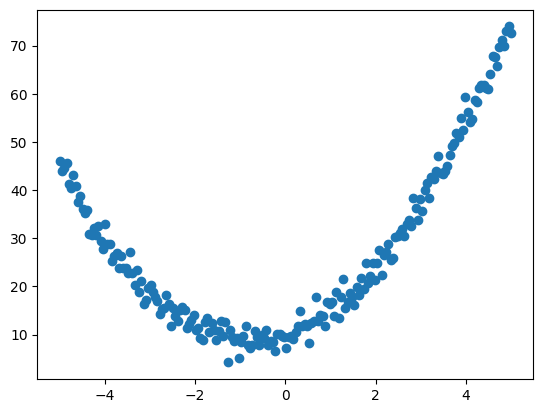

In [21]:
np.random.seed(42)
num_points = 200
x = np.linspace(-5, 5, num_points)
true_coefficients = [2, 3, 10]  # Coefficients for a second-order polynomial (ax^2 + bx + c)
y_true = np.polyval(true_coefficients, x)

noise_level = 2
y_noisy = y_true + np.random.normal(0, noise_level, size=num_points)

plt.scatter(x,y_noisy)

In [22]:
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=test_size, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160,) (40,) (160,) (40,)


In [23]:
degree = 10
poly_features = PolynomialFeatures(degree=degree)

x_train_poly = poly_features.fit_transform(x_train.reshape(-1, 1))
x_test_poly = poly_features.fit_transform(x_test.reshape(-1, 1))

model = LinearRegression()
model.fit(x_train_poly, y_train)

y_pred_lr = model.predict(x_test_poly)

In [24]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"RMSE (Linear Regression): {rmse_lr:.2f}")

RMSE (Linear Regression): 1.79


In [38]:
alphas = np.logspace(-10, 5, 50)
# alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
rmse_lasso = []

for alpha in alphas:
    model_lasso = Lasso(alpha=alpha, fit_intercept=True)
    model_lasso.fit(x_train_poly, y_train)
    y_pred_lasso = model_lasso.predict(x_test_poly)
    rmse_lasso.append(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print(rmse_lasso)
print(alphas)

[1.7379746199281232, 1.737974619939902, 1.7379746199637371, 1.737974620011968, 1.73797462010957, 1.737974620307074, 1.7379746207067444, 1.7379746215155094, 1.7379746231521205, 1.737974626463952, 1.7379746331657413, 1.7379746467274324, 1.73797467417082, 1.7379747297053292, 1.7379748420858414, 1.7379750695038343, 1.7379755297288981, 1.7379764611353634, 1.7379783463281164, 1.7379821628530752, 1.737989888506172, 1.7380055457297638, 1.7380373179743593, 1.7381019755230962, 1.7382343101795141, 1.7385083900583425, 1.7390885439931316, 1.7403741968259065, 1.743447288065816, 1.7516390768105043, 1.7772023747623937, 1.862888032423929, 2.1517474693658394, 2.669882626113774, 2.940826108288493, 3.13442739520625, 3.5885513811095495, 4.401443930264407, 4.957924512781453, 5.584268341714752, 6.0047086891726105, 6.442334657739564, 6.804405493605055, 7.286861379424217, 7.486374183337442, 8.01083207968023, 9.20598367305172, 9.744782286604131, 10.930319793279489, 12.124204981061885]
[1.00000000e-10 2.02358965

d:\Program files\PYTHON\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.693e+02, tolerance: 5.201e+00
  model = cd_fast.enet_coordinate_descent(
d:\Program files\PYTHON\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.693e+02, tolerance: 5.201e+00
  model = cd_fast.enet_coordinate_descent(
d:\Program files\PYTHON\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.693e+02, tolerance: 

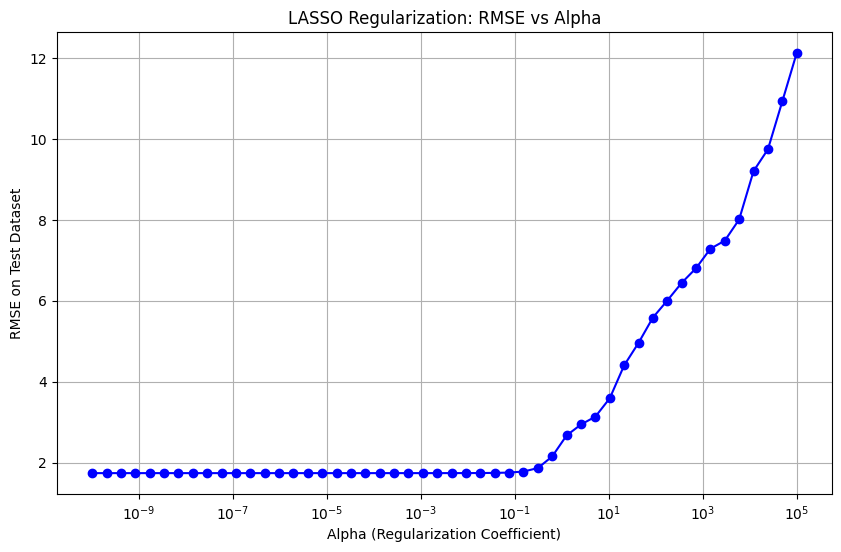

In [39]:
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, rmse_lasso, marker='o', linestyle='-', color='b')
plt.title('LASSO Regularization: RMSE vs Alpha')
plt.xlabel('Alpha (Regularization Coefficient)')
plt.ylabel('RMSE on Test Dataset')
plt.grid(True)
plt.show()

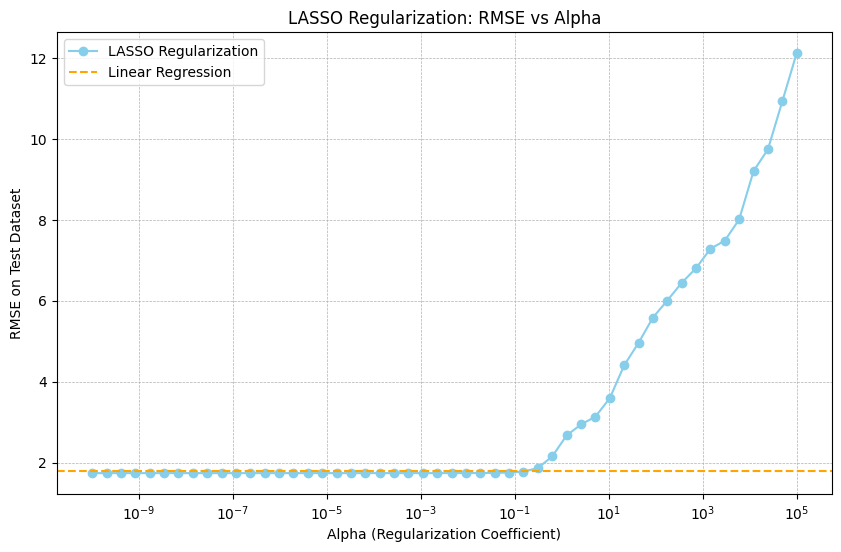

In [40]:


plt.figure(figsize=(10, 6))
plt.semilogx(alphas, rmse_lasso, marker='o', linestyle='-', color='skyblue', label='LASSO Regularization')
plt.axhline(y=rmse_lr, color='orange', linestyle='--', label='Linear Regression')
plt.title('LASSO Regularization: RMSE vs Alpha')
plt.xlabel('Alpha (Regularization Coefficient)')
plt.ylabel('RMSE on Test Dataset')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()